In [2]:
import json
import numpy as np
import pandas as pd
import plotly.graph_objects as go

In [3]:
# function to plot the costs and the performance - PGPE
def plot_performance_and_costs_pgpe(data, y_constraint, save_suffix=None, output_dir=None):
    """
    General function to plot performance and costs, and save the plots with a user-defined suffix.

    Parameters:
    - data (pd.DataFrame, json): Data containing performance and cost information
    - y_constraint (float): The value of the horizontal line (constraint bound) in the cost plot
    - save_suffix (str): User-defined suffix for saving images
    - output_dir (str): Directory where the plots will be saved
    """
    performance_deterministic = data['deterministic_perf_res']
    performance_stochastic = data['performance_rho']
    costs_deterministic = data['deterministic_cost_res']
    costs_stochastic = data['costs_rho']
    
    performance_deterministic = np.array(performance_deterministic).tolist()
    costs_deterministic = np.squeeze(np.array(costs_deterministic), -1).tolist()
    costs_stochastic  = np.squeeze(np.array(costs_stochastic), -1).tolist()

    iterations = list(range(len(performance_deterministic)))

    # Create the performance figure
    fig_performance = go.Figure()

    # Add the traces for performance
    fig_performance.add_trace(go.Scatter(
        x=iterations, y=performance_deterministic, mode='lines', name='Deterministic Performance',
        line=dict(color='#85210b', width=1)
    ))
    fig_performance.add_trace(go.Scatter(
        x=iterations, y=performance_stochastic, mode='lines', name='Stochastic Performance',
        line=dict(color='#CC3311', width=1)
    ))

    # Update layout for performance plot
    fig_performance.update_layout(
        title="Performance",
        xaxis_title="Iteration",
        yaxis_title="Performance",
        height=600, width=900,
        font=dict(size=15, family="serif"),
        showlegend=True,
        legend=dict(x=0.99, y=0.01, xanchor='right', yanchor='bottom', traceorder="normal"),
        plot_bgcolor='white',
        paper_bgcolor='white'
    )
    fig_performance.update_xaxes(
        mirror=True,
        ticks='outside',
        showline=True,
        linecolor='black',
        gridcolor='lightgrey'
    )
    fig_performance.update_yaxes(
        mirror=True,
        ticks='outside',
        showline=True,
        linecolor='black',
        gridcolor='lightgrey'
    )

    # Create the costs figure
    fig_costs = go.Figure()

    # Add the traces for costs
    fig_costs.add_trace(go.Scatter(
        x=iterations, y=costs_deterministic, mode='lines', name='Deterministic Cost',
        line=dict(color='#85210b', width=1)
    ))
    fig_costs.add_trace(go.Scatter(
        x=iterations, y=costs_stochastic, mode='lines', name='Stochastic Cost',
        line=dict(color='#CC3311', width=1)
    ))

    # Add a horizontal line at y = y_constraint and include it in the legend
    fig_costs.add_trace(go.Scatter(
        x=[0, len(iterations)], y=[y_constraint, y_constraint], mode='lines', name='Constraint Bound',
        line=dict(color="black", width=2, dash="dash")
    ))

    # Update layout for costs plot
    fig_costs.update_layout(
        title="Costs",
        xaxis_title="Iteration",
        yaxis_title="Costs",
        height=600, width=900,
        font=dict(size=15, family="serif"),
        showlegend=True,
        legend=dict(x=0.99, y=0.01, xanchor='right', yanchor='bottom', traceorder="normal"),
        plot_bgcolor='white',
        paper_bgcolor='white',
        xaxis=dict(showgrid=True),
        yaxis=dict(showgrid=True)
    )
    fig_costs.update_xaxes(
        mirror=True,
        ticks='outside',
        showline=True,
        linecolor='black',
        gridcolor='lightgrey'
    )
    fig_costs.update_yaxes(
        mirror=True,
        ticks='outside',
        showline=True,
        linecolor='black',
        gridcolor='lightgrey'
    )

    # Display the figures
    fig_performance.show()
    fig_costs.show()

    # Save the figures with user-defined suffix
    if output_dir is not None:
        fig_performance.write_image(
            f'{output_dir}/{save_suffix}_performance.png',
            width=900, height=600, scale=3
        )
        fig_costs.write_image(
            f'{output_dir}/{save_suffix}_cost.png',
            width=900, height=600, scale=3
        )


In [4]:
# function to plot the costs and the performance - PGPE with variance (std deviation)
def plot_performance_and_costs_pgpe_with_variance(data, y_constraint, save_suffix=None, output_dir=None):
    """
    General function to plot performance, costs, and their variance, and save the plots with a user-defined suffix.

    Parameters:
    - data (pd.DataFrame, json): Data containing performance, cost, and variance information
    - y_constraint (float): The value of the horizontal line (constraint bound) in the cost plot
    - save_suffix (str): User-defined suffix for saving images
    - output_dir (str): Directory where the plots will be saved
    """
    # Extract data
    performance_deterministic = np.array(data['performance_deterministic_mean']).tolist()
    performance_stochastic = np.array(data['performance_stochastic_mean']).tolist()
    performance_deterministic_std = np.array(data['performance_deterministic_std']).tolist()
    performance_stochastic_std = np.array(data['performance_stochastic_std']).tolist()

    costs_deterministic = np.array(data['costs_deterministic_mean'])
    costs_stochastic = np.array(data['costs_stochastic_mean'])
    costs_deterministic_std = np.array(data['costs_deterministic_std'])
    costs_stochastic_std = np.array(data['costs_stochastic_std'])

    iterations = list(range(len(performance_deterministic)))

    # Create the performance figure
    fig_performance = go.Figure()

    # Add the traces for performance
    fig_performance.add_trace(go.Scatter(
        x=iterations, y=performance_deterministic, mode='lines', name=r'J<sub>0, D</sub>',
        line=dict(color='black', width=1)  # Changed to black
    ))
    fig_performance.add_trace(go.Scatter(
        x=iterations, y=performance_stochastic, mode='lines', name=r'J<sub>0, <span style="color:#CC3311">P</span></sub>',
        line=dict(color='#CC3311', width=1)
    ))

    # Add variance (shaded area)
    fig_performance.add_trace(go.Scatter(
        x=iterations + iterations[::-1], 
        y=(np.array(performance_deterministic) + np.array(performance_deterministic_std)).tolist() + (np.array(performance_deterministic) - np.array(performance_deterministic_std)).tolist()[::-1],
        fill='toself', fillcolor='rgba(0, 0, 0, 0.2)', line=dict(color='rgba(255,255,255,0)'), showlegend=False,
        name='Deterministic Performance Variance'
    ))
    fig_performance.add_trace(go.Scatter(
        x=iterations + iterations[::-1], 
        y=(np.array(performance_stochastic) + np.array(performance_stochastic_std)).tolist() + (np.array(performance_stochastic) - np.array(performance_stochastic_std)).tolist()[::-1],
        fill='toself', fillcolor='rgba(204, 51, 17, 0.2)', line=dict(color='rgba(255,255,255,0)'), showlegend=False,
        name='Stochastic Performance Variance'
    ))

    # Update layout for performance plot
    fig_performance.update_layout(
        title=r'J<sub>0, <span style="color:#CC3311">P</span></sub> with σ<sub><span style="color:#CC3311">P</span></sub>² = 0.075',
        xaxis_title="Iteration",
        yaxis_title="Performance Indx",
        height=600, width=900,
        font=dict(size=15, family="serif"),
        showlegend=True,
        legend=dict(x=0.99, y=0.01, xanchor='right', yanchor='bottom', traceorder="normal"),
        plot_bgcolor='white',
        paper_bgcolor='white'
    )
    fig_performance.update_xaxes(
        mirror=True,
        ticks='outside',
        showline=True,
        linecolor='black',
        gridcolor='lightgrey'
    )
    fig_performance.update_yaxes(
        mirror=True,
        ticks='outside',
        showline=True,
        linecolor='black',
        gridcolor='lightgrey'
    )

    # Create the costs figure
    fig_costs = go.Figure()

    # Add the traces for costs
    fig_costs.add_trace(go.Scatter(
        x=iterations, y=costs_deterministic, mode='lines', name='Deterministic Cost',
        line=dict(color='black', width=1)  # Changed to black
    ))
    fig_costs.add_trace(go.Scatter(
        x=iterations, y=costs_stochastic, mode='lines', name='Stochastic Cost',
        line=dict(color='#CC3311', width=1)
    ))

    # Add variance (shaded area) for costs
    fig_costs.add_trace(go.Scatter(
        x=iterations + iterations[::-1], 
        y=(np.array(costs_deterministic) + np.array(costs_deterministic_std)).tolist() + (np.array(costs_deterministic) - np.array(costs_deterministic_std)).tolist()[::-1],
        fill='toself', fillcolor='rgba(0, 0, 0, 0.2)', line=dict(color='rgba(255,255,255,0)'), showlegend=False,
        name='Deterministic Cost Variance'
    ))
    fig_costs.add_trace(go.Scatter(
        x=iterations + iterations[::-1], 
        y=(np.array(costs_stochastic) + np.array(costs_stochastic_std)).tolist() + (np.array(costs_stochastic) - np.array(costs_stochastic_std)).tolist()[::-1],
        fill='toself', fillcolor='rgba(204, 51, 17, 0.2)', line=dict(color='rgba(255,255,255,0)'), showlegend=False,
        name='Stochastic Cost Variance'
    ))

    # Add a horizontal line at y = y_constraint and include it in the legend
    fig_costs.add_trace(go.Scatter(
        x=[0, len(iterations)], y=[y_constraint, y_constraint], mode='lines', name='Constraint Bound',
        line=dict(color="black", width=2, dash="dash")
    ))

    # Update layout for costs plot
    fig_costs.update_layout(
        title="Costs",
        xaxis_title="Iteration",
        yaxis_title="Costs",
        height=600, width=900,
        font=dict(size=15, family="serif"),
        showlegend=True,
        legend=dict(x=0.99, y=0.01, xanchor='right', yanchor='bottom', traceorder="normal"),
        plot_bgcolor='white',
        paper_bgcolor='white'
    )
    fig_costs.update_xaxes(
        mirror=True,
        ticks='outside',
        showline=True,
        linecolor='black',
        gridcolor='lightgrey'
    )
    fig_costs.update_yaxes(
        mirror=True,
        ticks='outside',
        showline=True,
        linecolor='black',
        gridcolor='lightgrey'
    )

    # Display the figures
    fig_performance.show()
    fig_costs.show()

    # Save the figures with user-defined suffix
    if output_dir is not None:
        fig_performance.write_image(
            f'{output_dir}/{save_suffix}_performance.png',
            width=900, height=600, scale=3
        )
        fig_costs.write_image(
            f'{output_dir}/{save_suffix}_cost.png',
            width=900, height=600, scale=3
        )


In [5]:
# function to plot the costs and the performance - PGAE
def plot_performance_and_costs_pgae(data, y_constraint, save_suffix=None, output_dir=None):
    """
    General function to plot performance and costs, and save the plots with a user-defined suffix.

    Parameters:
    - data (pd.DataFrame, json): Data containing performance and cost information
    - y_constraint (float): The value of the horizontal line (constraint bound) in the cost plot
    - save_suffix (str): User-defined suffix for saving images
    - output_dir (str): Directory where the plots will be saved
    """
    performance_deterministic_pgae = data['deterministic_perf_res']
    performance_stochastic_pgae = data['performance']
    costs_deterministic_pgae = data['deterministic_cost_res']
    costs_stochastic_pgae = data['costs']
    
    performance_deterministic_pgae = np.array(performance_deterministic_pgae).tolist()
    costs_deterministic_pgae = np.squeeze(np.array(costs_deterministic_pgae), -1).tolist()
    costs_stochastic_pgae  = np.squeeze(np.array(costs_stochastic_pgae), -1).tolist()

    iterations = list(range(len(performance_deterministic_pgae)))

    # Create the performance figure
    fig_performance = go.Figure()

    # Add the traces for performance
    fig_performance.add_trace(go.Scatter(
        x=iterations, y=performance_deterministic_pgae, mode='lines', name='Deterministic Performance',
        line=dict(color='#00466f', width=1)
    ))
    fig_performance.add_trace(go.Scatter(
        x=iterations, y=performance_stochastic_pgae, mode='lines', name='Stochastic Performance',
        line=dict(color='#0077BB', width=1)
    ))

    # Update layout for performance plot
    fig_performance.update_layout(
        title="Performance",
        xaxis_title="Iteration",
        yaxis_title="Performance",
        height=600, width=900,
        font=dict(size=15, family="serif"),
        showlegend=True,
        legend=dict(x=1, y=0, xanchor='right', yanchor='bottom', traceorder="normal"),
        plot_bgcolor='white',
        paper_bgcolor='white'
    )
    fig_performance.update_xaxes(
        mirror=True,
        ticks='outside',
        showline=True,
        linecolor='black',
        gridcolor='lightgrey'
    )
    fig_performance.update_yaxes(
        mirror=True,
        ticks='outside',
        showline=True,
        linecolor='black',
        gridcolor='lightgrey'
    )

    # Create the costs figure
    fig_costs = go.Figure()

    # Add the traces for costs
    fig_costs.add_trace(go.Scatter(
        x=iterations, y=costs_deterministic_pgae, mode='lines', name='Deterministic Cost',
        line=dict(color='#00466f', width=1)
    ))
    fig_costs.add_trace(go.Scatter(
        x=iterations, y=costs_stochastic_pgae, mode='lines', name='Stochastic Cost',
        line=dict(color='#0077BB', width=1)
    ))

    # Add a horizontal line at y = y_constraint and include it in the legend
    fig_costs.add_trace(go.Scatter(
        x=[0, len(iterations)], y=[y_constraint, y_constraint], mode='lines', name='Constraint Bound',
        line=dict(color="black", width=2, dash="dash")
    ))

    # Update layout for costs plot
    fig_costs.update_layout(
        title="Costs",
        xaxis_title="Iteration",
        yaxis_title="Costs",
        height=600, width=900,
        font=dict(size=15, family="serif"),
        showlegend=True,
        legend=dict(x=0, y=1, xanchor='left', yanchor='top', traceorder="normal"),
        plot_bgcolor='white',
        paper_bgcolor='white',
        xaxis=dict(showgrid=True),
        yaxis=dict(showgrid=True)
    )
    fig_costs.update_xaxes(
        mirror=True,
        ticks='outside',
        showline=True,
        linecolor='black',
        gridcolor='lightgrey'
    )
    fig_costs.update_yaxes(
        mirror=True,
        ticks='outside',
        showline=True,
        linecolor='black',
        gridcolor='lightgrey'
    )

    # Display the figures
    fig_performance.show()
    fig_costs.show()

    # Save the figures with user-defined suffix
    if output_dir is not None:
        fig_performance.write_image(
            f'{output_dir}/{save_suffix}_performance.png',
            width=900, height=600, scale=3
        )
        fig_costs.write_image(
            f'{output_dir}/{save_suffix}_cost.png',
            width=900, height=600, scale=3
        )


# CPGPE - Plots


In [7]:
with open(f'/Users/leonardo/Desktop/Thesis/Data/cpgpe_results.json', 'r') as f:
    data = json.load(f)
plot_performance_and_costs_pgpe(data, 5, 'cpgpe_var_0_01_b_5', '/Users/leonardo/Desktop/Thesis/MagicRL/images/cpg')

# CPGPE - Variance Study

In [13]:
data = []
var = "0001" #  0.1 -> 01
for i in range(5):
    with open(f'/Users/leonardo/Desktop/Thesis/cpgpe_var_{var}_b_5/cpgpe_3000_swimmer_100_adam_p0001_d001_linear_batch_100_reg_00001_risk_tc_p16_var_{var}_a_trial_{i}/cpgpe_results.json', 'r') as f:
        data.append(json.load(f))


In [14]:
performance_deterministic = pd.DataFrame([])
performance_stochastic = pd.DataFrame([])
costs_deterministic = pd.DataFrame([])
costs_stochastic = pd.DataFrame([])

for i in range(5):
    performance_deterministic = pd.concat(
        [performance_deterministic, pd.DataFrame(np.array(data[i]['deterministic_perf_res']).tolist())], 
        axis=1
    )
    performance_stochastic = pd.concat(
        [performance_stochastic, pd.DataFrame(np.array(data[i]['performance_rho']).tolist())], 
        axis=1
    )
    costs_deterministic = pd.concat(
        [costs_deterministic, pd.DataFrame(np.squeeze(np.array(data[i]['deterministic_cost_res']), -1).tolist())], 
        axis=1
    )
    costs_stochastic = pd.concat(
        [costs_stochastic, pd.DataFrame(np.squeeze(np.array(data[i]['costs_rho']), -1).tolist())], 
        axis=1
    )


In [15]:
# Deterministic performance mean and std deviation
performance_deterministic_mean = pd.DataFrame(
    np.mean(performance_deterministic, axis=1), 
    columns=['performance_deterministic_mean']
)
performance_deterministic_std = pd.DataFrame(
    np.std(performance_deterministic, axis=1) * 2.92 / np.sqrt(5), 
    columns=['performance_deterministic_std']
)

# Stochastic performance mean and std deviation
performance_stochastic_mean = pd.DataFrame(
    np.mean(performance_stochastic, axis=1), 
    columns=['performance_stochastic_mean']
)
performance_stochastic_std = pd.DataFrame(
    np.std(performance_stochastic, axis=1) * 2.92 / np.sqrt(5), 
    columns=['performance_stochastic_std']
)

# Deterministic cost mean and std deviation
costs_deterministic_mean = pd.DataFrame(
    np.mean(costs_deterministic, axis=1), 
    columns=['costs_deterministic_mean']
)
costs_deterministic_std = pd.DataFrame(
    np.std(costs_deterministic, axis=1) * 2.92 / np.sqrt(5), 
    columns=['costs_deterministic_std']
)

# Stochastic cost mean and std deviation
costs_stochastic_mean = pd.DataFrame(
    np.mean(costs_stochastic, axis=1), 
    columns=['costs_stochastic_mean']
)
costs_stochastic_std = pd.DataFrame(
    np.std(costs_stochastic, axis=1) * 2.92 / np.sqrt(5), 
    columns=['costs_stochastic_std']
)

In [16]:
df = pd.concat([performance_deterministic_mean, performance_deterministic_std, performance_stochastic_mean, performance_stochastic_std, costs_deterministic_mean, costs_deterministic_std, costs_stochastic_mean, costs_stochastic_std
                ], axis = 1)

In [21]:
y_constraint = 5

# Extract data
performance_deterministic = np.array(df['performance_deterministic_mean']).tolist()
performance_stochastic = np.array(df['performance_stochastic_mean']).tolist()
performance_deterministic_std = np.array(df['performance_deterministic_std']).tolist()
performance_stochastic_std = np.array(df['performance_stochastic_std']).tolist()

costs_deterministic = np.array(df['costs_deterministic_mean'])
costs_stochastic = np.array(df['costs_stochastic_mean'])
costs_deterministic_std = np.array(df['costs_deterministic_std'])
costs_stochastic_std = np.array(df['costs_stochastic_std'])

iterations = list(range(len(performance_deterministic)))

# Create the performance figure
fig_performance = go.Figure()

# Add the traces for performance
fig_performance.add_trace(go.Scatter(
    x=iterations, y=performance_deterministic, mode='lines', name=r'J<sub>0, D</sub>',
    line=dict(color='black', width=1)  # Changed to black
))
fig_performance.add_trace(go.Scatter(
    x=iterations, y=performance_stochastic, mode='lines', name=r'J<sub>0, <span style="color:#CC3311">P</span></sub>',
    line=dict(color='#CC3311', width=1)
))

# Add variance (shaded area)
fig_performance.add_trace(go.Scatter(
    x=iterations + iterations[::-1], 
    y=(np.array(performance_deterministic) + np.array(performance_deterministic_std)).tolist() + (np.array(performance_deterministic) - np.array(performance_deterministic_std)).tolist()[::-1],
    fill='toself', fillcolor='rgba(0, 0, 0, 0.2)', line=dict(color='rgba(255,255,255,0)'), showlegend=False,
    name='Deterministic Performance Variance'
))
fig_performance.add_trace(go.Scatter(
    x=iterations + iterations[::-1], 
    y=(np.array(performance_stochastic) + np.array(performance_stochastic_std)).tolist() + (np.array(performance_stochastic) - np.array(performance_stochastic_std)).tolist()[::-1],
    fill='toself', fillcolor='rgba(204, 51, 17, 0.2)', line=dict(color='rgba(255,255,255,0)'), showlegend=False,
    name='Stochastic Performance Variance'
))

# Update layout for performance plot
fig_performance.update_layout(
    title=r'J<sub>0, <span style="color:#CC3311">P</span></sub> and J <sub>0, D </sub> with σ<sub><span style="color:#CC3311">P</span></sub>² = 0.001 and b = 5',
    xaxis_title="Iteration",
    yaxis_title="Performance Index",
    height=600, width=900,
    font=dict(size=15, family="serif"),
    showlegend=True,
    legend=dict(x=0.99, y=0.01, xanchor='right', yanchor='bottom', traceorder="normal"),
    plot_bgcolor='white',
    paper_bgcolor='white'
)
fig_performance.update_xaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)
fig_performance.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey',
    range=[0, 30]
)

# Create the costs figure
fig_costs = go.Figure()

# Add the traces for costs
fig_costs.add_trace(go.Scatter(
    x=iterations, y=costs_deterministic, mode='lines', name=r'J<sub>c, D</sub>',
    line=dict(color='black', width=1)  # Changed to black
))
fig_costs.add_trace(go.Scatter(
    x=iterations, y=costs_stochastic, mode='lines', name=r'J<sub>c, <span style="color:#CC3311">P</span></sub>',
    line=dict(color='#CC3311', width=1)
))

# Add variance (shaded area) for costs
fig_costs.add_trace(go.Scatter(
    x=iterations + iterations[::-1], 
    y=(np.array(costs_deterministic) + np.array(costs_deterministic_std)).tolist() + (np.array(costs_deterministic) - np.array(costs_deterministic_std)).tolist()[::-1],
    fill='toself', fillcolor='rgba(0, 0, 0, 0.2)', line=dict(color='rgba(255,255,255,0)'), showlegend=False,
    name='Deterministic Cost Variance'
))
fig_costs.add_trace(go.Scatter(
    x=iterations + iterations[::-1], 
    y=(np.array(costs_stochastic) + np.array(costs_stochastic_std)).tolist() + (np.array(costs_stochastic) - np.array(costs_stochastic_std)).tolist()[::-1],
    fill='toself', fillcolor='rgba(204, 51, 17, 0.2)', line=dict(color='rgba(255,255,255,0)'), showlegend=False,
    name='Stochastic Cost Variance'
))

# Add a horizontal line at y = y_constraint and include it in the legend
fig_costs.add_trace(go.Scatter(
    x=[0, len(iterations)], y=[y_constraint, y_constraint], mode='lines', name='Constraint Bound',
    line=dict(color="black", width=2, dash="dash")
))

# Update layout for costs plot
fig_costs.update_layout(
    title=r'J<sub>c, <span style="color:#CC3311">P</span></sub> and J <sub>c, D </sub> with σ<sub><span style="color:#CC3311">P</span></sub>² = 0.001 and b = 5',
    xaxis_title="Iteration",
    yaxis_title="Cost Index",
    height=600, width=900,
    font=dict(size=15, family="serif"),
    showlegend=True,
    legend=dict(x=0, y=1, xanchor='left', yanchor='top', traceorder="normal"),
    plot_bgcolor='white',
    paper_bgcolor='white'
)
fig_costs.update_xaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)
fig_costs.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey',
    range=[-5, 20]
)

# Display the figures
fig_performance.show()
fig_costs.show()

In [23]:
file_path = f'/Users/leonardo/Desktop/Thesis/MagicRL/images/performance_cpgpe_var_{var}_b_5.png'
fig_performance.write_image(file_path, format='png', scale=3)
file_path = f'/Users/leonardo/Desktop/Thesis/MagicRL/images/cost_cpgpe_var_{var}_b_5.png'
fig_costs.write_image(file_path, format='png', scale=3)

# CPGE - Comparison

In [12]:
def extract_data(var):
    data = []
    for i in range(5):
        with open(f'/Users/leonardo/Desktop/Thesis/cpgpe_var_{var}/cpgpe_3000_swimmer_100_adam_p0001_d001_linear_batch_100_reg_00001_risk_tc_p16_var_{var}_a_trial_{i}/cpgpe_results.json', 'r') as f:
            data.append(json.load(f))
        
    performance_deterministic = pd.DataFrame([])
    performance_stochastic = pd.DataFrame([])
    costs_deterministic = pd.DataFrame([])
    costs_stochastic = pd.DataFrame([])
    
    for i in range(5):
        performance_deterministic = pd.concat(
            [performance_deterministic, pd.DataFrame(np.array(data[i]['deterministic_perf_res']).tolist(), columns = [f'det_perf_t_{i}'])], 
            axis=1
        )
        performance_stochastic = pd.concat(
            [performance_stochastic, pd.DataFrame(np.array(data[i]['performance_rho']).tolist(),  columns = [f'stoc_perf_t_{i}'])], 
            axis=1
        )
        costs_deterministic = pd.concat(
            [costs_deterministic, pd.DataFrame(np.squeeze(np.array(data[i]['deterministic_cost_res']), -1).tolist(), columns = [f'det_cost_t_{i}'])], 
            axis=1
        )
        costs_stochastic = pd.concat(
            [costs_stochastic, pd.DataFrame(np.squeeze(np.array(data[i]['costs_rho']), -1).tolist(), columns = [f'stoc_cost_t_{i}'])], 
            axis=1
        )
        
    return pd.concat([performance_deterministic, performance_stochastic, costs_deterministic, costs_stochastic], axis = 1)


In [13]:
data_00001 = extract_data("00001")
data_00005 = extract_data("00005")
data_000075 = extract_data("000075")
data_0001 = extract_data("0001")
data_0005= extract_data("0005")
data_00075 = extract_data("00075")
data_001 = extract_data("001")
data_005 = extract_data("005")
data_0075 = extract_data("0075")

In [14]:
last = 100
# Take the last 100 rows of each dataframe
data_00001 = data_00001.iloc[-last:]
data_00005 = data_00005.iloc[-last:]
data_000075 = data_000075.iloc[-last:]
data_0001 = data_0001.iloc[-last:]
data_0005 = data_0005.iloc[-last:]
data_00075 = data_00075.iloc[-last:]
data_001 = data_001.iloc[-last:]
data_005 = data_005.iloc[-last:]
data_0075 = data_0075.iloc[-last:]

In [15]:
def mean_confidece(df):
    # Mean 
    performance_deterministic = df.filter(like='det_perf').mean()
    performance_stochastic = df.filter(like='stoc_perf').mean()
    costs_deterministic = df.filter(like='det_cost').mean()
    costs_stochastic = df.filter(like='stoc_cost').mean()
    
    performance_deterministic_mean = performance_deterministic.mean()
    performance_stochastic_mean = performance_stochastic.mean()
    costs_deterministic_mean = costs_deterministic.mean()
    costs_stochastic_mean = costs_stochastic.mean()
    
    # Confidence interval at 95%
    performance_deterministic_ci = performance_deterministic.filter(like='det_perf').std() * 2.92 / np.sqrt(5)
    performance_stochastic_ci = performance_stochastic.filter(like='stoc_perf').std() * 2.92 / np.sqrt(5)
    costs_deterministic_ci = costs_deterministic.filter(like='det_cost').std() * 2.92 / np.sqrt(5)
    costs_stochastic_ci = costs_stochastic.filter(like='stoc_cost').std() * 2.92 / np.sqrt(5)
    
    output = {
        "performance_deterministic_mean": performance_deterministic_mean,
        "performance_stochastic_mean": performance_stochastic_mean,
        "costs_deterministic_mean": costs_deterministic_mean,
        "costs_stochastic_mean": costs_stochastic_mean,
        "performance_deterministic_ci": performance_deterministic_ci,
        "performance_stochastic_ci": performance_stochastic_ci,
        "costs_deterministic_ci": costs_deterministic_ci,
        "costs_stochastic_ci": costs_stochastic_ci
    }
    
    return output

In [17]:
mean_variances = dict() 
mean_variances['0.0001'] = mean_confidece(data_00001)
mean_variances['0.0005'] = mean_confidece(data_00005)
mean_variances['0.00075'] = mean_confidece(data_000075)
mean_variances['0.001'] = mean_confidece(data_0001)
mean_variances['0.005'] = mean_confidece(data_0005)
mean_variances['0.0075'] = mean_confidece(data_00075)
mean_variances['0.01'] = mean_confidece(data_001)
mean_variances['0.05'] = mean_confidece(data_005)
mean_variances['0.075'] = mean_confidece(data_0075)

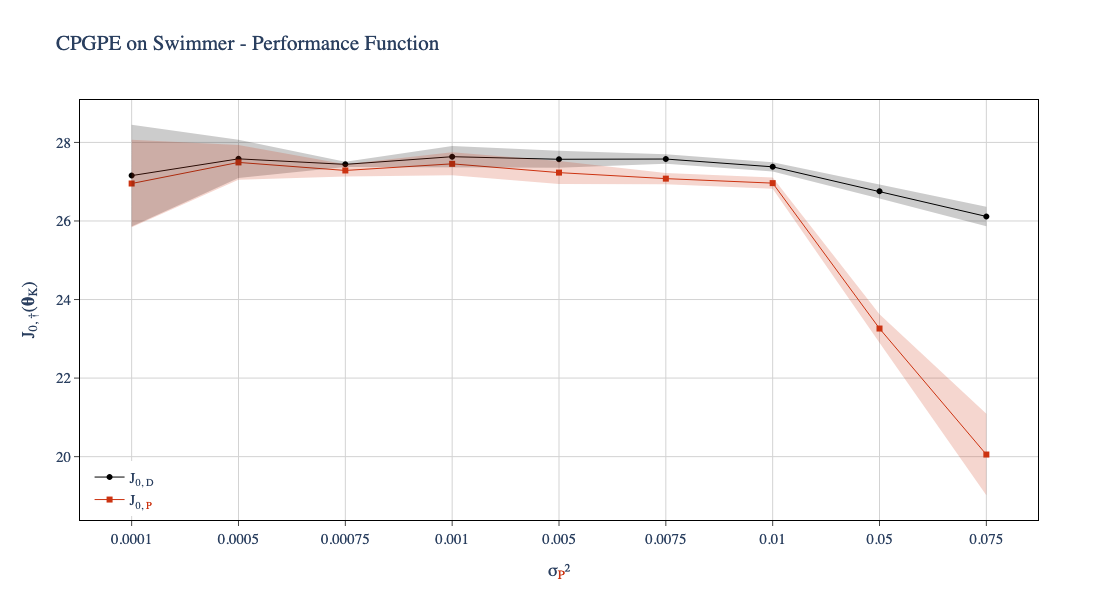

In [18]:
# Create the performance figure
fig_performance = go.Figure()

# Add the traces for deterministic performance with markers (dots)
fig_performance.add_trace(go.Scatter(
    x=list(mean_variances.keys()), 
    y=[mean_variances[key]['performance_deterministic_mean'] for key in mean_variances.keys()], 
    mode='lines+markers',  # Adding markers to the line
    name=r'J<sub>0, D</sub>',
    line=dict(color='black', width=1),  # Line in black
    marker=dict(color='black', size=6, symbol='circle')  # Dots in black
))

# Add the traces for stochastic performance with markers (dots)
fig_performance.add_trace(go.Scatter(
    x=list(mean_variances.keys()), 
    y=[mean_variances[key]['performance_stochastic_mean'] for key in mean_variances.keys()], 
    mode='lines+markers',  # Adding markers to the line
    name=r'J<sub>0, <span style="color:#CC3311">P</span></sub>',
    line=dict(color='#CC3311', width=1),  # Line in custom color
    marker=dict(color='#CC3311', size=6, symbol='square')  # Dots in the same custom color
))

# Add variance (shaded area) for deterministic performance
fig_performance.add_trace(go.Scatter(
    x=list(mean_variances.keys()) + list(mean_variances.keys())[::-1], 
    y=[(mean_variances[key]['performance_deterministic_mean'] + mean_variances[key]['performance_deterministic_ci']) for key in mean_variances.keys()] + 
      [(mean_variances[key]['performance_deterministic_mean'] - mean_variances[key]['performance_deterministic_ci']) for key in mean_variances.keys()][::-1],
    fill='toself', 
    fillcolor='rgba(0, 0, 0, 0.2)', 
    line=dict(color='rgba(255,255,255,0)'), 
    showlegend=False,
    name='Deterministic Performance Variance'
))

# Add variance (shaded area) for stochastic performance
fig_performance.add_trace(go.Scatter(
    x=list(mean_variances.keys()) + list(mean_variances.keys())[::-1], 
    y=[(mean_variances[key]['performance_stochastic_mean'] + mean_variances[key]['performance_stochastic_ci']) for key in mean_variances.keys()] + 
      [(mean_variances[key]['performance_stochastic_mean'] - mean_variances[key]['performance_stochastic_ci']) for key in mean_variances.keys()][::-1],
    fill='toself', 
    fillcolor='rgba(204, 51, 17, 0.2)', 
    line=dict(color='rgba(255,255,255,0)'), 
    showlegend=False,
    name='Stochastic Performance Variance'
))

# Update layout for performance plot
fig_performance.update_layout(
    title="CPGPE on Swimmer - Performance Function",
    xaxis_title='σ<sub><span style="color:#CC3311">P</span></sub>²',
    yaxis_title='J<sub>0, &#8224;</sub>(<b>&#952;</b><sub>K</sub>)',
    height=600, width=900,
    font=dict(size=15, family="serif"),
    showlegend=True,
    legend=dict(x=0.01, y=0.01, xanchor='left', yanchor='bottom', traceorder="normal"),
    plot_bgcolor='white',
    paper_bgcolor='white'
)

# Update x-axes
fig_performance.update_xaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)

# Update y-axes
fig_performance.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)

# Display the figure
fig_performance.show()

In [19]:
file_path = '/Users/leonardo/Desktop/Thesis/MagicRL/images/performance_cpgpe_comparison.png'
fig_performance.write_image(file_path, format='png', scale=3)

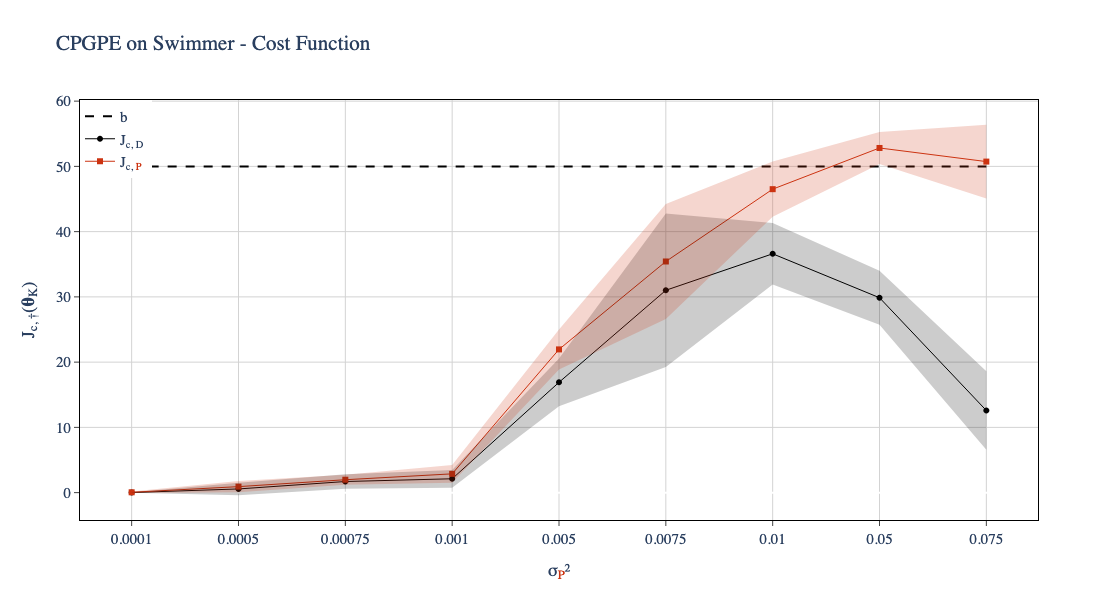

In [22]:
# Create the performance figure
fig_cost = go.Figure()


# Add a horizontal line at y = threshold
fig_cost.add_trace(go.Scatter(
    x=list(mean_variances.keys()), 
    y=[50] * len(mean_variances.keys()),  
    mode='lines',  
    name='b', 
    line=dict(color='black', width=2, dash='dash')
))

# Add the traces for deterministic performance with markers (dots)
fig_cost.add_trace(go.Scatter(
    x=list(mean_variances.keys()), 
    y=[mean_variances[key]['costs_deterministic_mean'] for key in mean_variances.keys()], 
    mode='lines+markers',  # Adding markers to the line
    name=r'J<sub>c, D</sub>',
    line=dict(color='black', width=1),  # Line in black
    marker=dict(color='black', size=6, symbol='circle')  # Dots in black
))

# Add the traces for stochastic performance with markers (dots)
fig_cost.add_trace(go.Scatter(
    x=list(mean_variances.keys()), 
    y=[mean_variances[key]['costs_stochastic_mean'] for key in mean_variances.keys()], 
    mode='lines+markers',  # Adding markers to the line
    name=r'J<sub>c, <span style="color:#CC3311">P</span></sub>',
    line=dict(color='#CC3311', width=1),  # Line in custom color
    marker=dict(color='#CC3311', size=6, symbol='square')  # Dots in the same custom color
))

# Add variance (shaded area) for deterministic performance
fig_cost.add_trace(go.Scatter(
    x=list(mean_variances.keys()) + list(mean_variances.keys())[::-1], 
    y=[(mean_variances[key]['costs_deterministic_mean'] + mean_variances[key]['costs_deterministic_ci']) for key in mean_variances.keys()] + 
      [(mean_variances[key]['costs_deterministic_mean'] - mean_variances[key]['costs_deterministic_ci']) for key in mean_variances.keys()][::-1],
    fill='toself', 
    fillcolor='rgba(0, 0, 0, 0.2)', 
    line=dict(color='rgba(255,255,255,0)'), 
    showlegend=False,
    name='Deterministic Cost Variance'
))

# Add variance (shaded area) for stochastic performance
fig_cost.add_trace(go.Scatter(
    x=list(mean_variances.keys()) + list(mean_variances.keys())[::-1], 
    y=[(mean_variances[key]['costs_stochastic_mean'] + mean_variances[key]['costs_stochastic_ci']) for key in mean_variances.keys()] + 
      [(mean_variances[key]['costs_stochastic_mean'] - mean_variances[key]['costs_stochastic_ci']) for key in mean_variances.keys()][::-1],
    fill='toself', 
    fillcolor='rgba(204, 51, 17, 0.2)', 
    line=dict(color='rgba(255,255,255,0)'), 
    showlegend=False,
    name='Stochastic Cost Variance'
))

fig_cost.update_layout(
    title="CPGPE on Swimmer - Cost Function",
    xaxis_title='σ<sub><span style="color:#CC3311">P</span></sub>²',
    yaxis_title='J<sub>c, &#8224;</sub>(<b>&#952;</b><sub>K</sub>)',
    height=600, width=900,
    font=dict(size=15, family="serif"),
    showlegend=True,
    legend=dict(
        x=0,  
        y=1,  
        xanchor='left',  
        yanchor='top', 
        traceorder="normal"
    ),
    plot_bgcolor='white',
    paper_bgcolor='white'
)

# Update x-axes
fig_cost.update_xaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)

# Update y-axes
fig_cost.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)

# Display the figure
fig_cost.show()



In [23]:
file_path = '/Users/leonardo/Desktop/Thesis/MagicRL/images/cost_cpgpe_comparison.png'
fig_cost.write_image(file_path, format='png', scale=3)

# CPGAE - Exploration of parameters

In [8]:
var = "0075"
i = 0
with open(f'/Users/leonardo/Desktop/Thesis/cpg_var_{var}/cpg_3000_swimmer_100_adam_p0001_d001_gaussian_batch_100_reg_00001_risk_tc_p16_var_{var}_a_trial_{i}/cpg_results.json', 'r') as f:
    data = json.load(f)

In [9]:
plot_performance_and_costs_pgae(data, 10, save_suffix=f'cpg_var_{var}', output_dir='/Users/leonardo/Desktop/Thesis/MagicRL/images/cpg')